# LAB 07 GAN REPORT

----------------------------
``` py
Name = 'Ati tesakulsiri'
ID = 'st123009'
```
----------------------------

## 1. Introduction

#### Generative Models vs Discriminative Models

Discriminative models are typically used for classification in machine learning.
Discriminative classifiers take a set of features $x$, such as having a nose or wheels,
and from these features determine a category $y$, 
meaning that they try to model the probability of class $y$ given the set of features $x$.
Assuming $X$ is a random variable over sets of features and $Y$ is a random variable over sets of possible classes,
a discriminative models estimates

$$D(x) = P(Y=y \mid X=x).$$

Generative models, however, model $P(x)$ or $P(x \mid y)$.
Generative models based on sampling take a random input and sometimes also a class $y$ such as a "dog."
From these inputs, a generative sampler will attempt to generate a set of features $x$ that are
representative of the class "dog." The random noise input ensures that we don't generate the same
dog each time.

Assuming random noise distribution $N$, a conditional sample-based generative model attempts
the following:

1. Input class $y$
2. $z \sim N$
3. $x = G(z,y)$

the goal is $P_{z\sim N}(G(z,y)=x) = P(x \mid y)$.


#### Generative Adversarial Networks (GANS)

GANs for images are composed of two models, a generator that generates images
and a discriminator that is a discriminative classifier.
The generator takes in a random noise input and an optional class and
deterministically transforms the input into an image. The discriminator attempts to 
determine which of its inputs are real samples from the data distribution and which ones
are fake samples generated by the generator. Over time, the models compete. If the training is
set up well, when complete, the generator can take in any random noise input and produce a realistic result.
In summary, $G$ learns to produce realistic examples like an artist painting paintings that look like photos,
while $D$ distinguishes the painted photos from real photos.
The basic GAN model described by Goodfellow et al. (2014) looks like this:

#### Conditional GANs

- #### Unconditional GANs

Until now, we know how to use GANs to generate some images. However, we never know what is the image classes which it generated. We call the GANs at above that **Unconditional GANs**.
The unconditional GANs may useful for creating some dataset, but it is not good that we don't know which images will be generated.

- #### Conditional GANs

From the problem above, we want the generator to generate the specific data more than randomize the output, so **conditional GANs** has been created to address it. Conditional generation allows you to get the sample from a specific class.

The thing you need for train the conditional GANs is **Labeled class**.

| Unconditional GANs  | Conditional GANs |
|:---:|:---:|
| Get random samples from **random classes** | Get random sample from **specific class** |
| Training dataset does **not require labeled classes**. | Training dataset **requires labeled classes**. |

#### Controllable Generation

Controllable generation allows you to control some of the features that you want in your output examples. For instance, with a gan that performs face generation, you could control the age of the person's looks in the image or if they have sunglasses or the direction they're looking at in the picture, or they're perceived gender. You can do this by actually tweaking the input noise vector Z, that is fed to the generator after you train the model. 



### Entanglement and Regularization
You may also notice that sometimes more features than just the target feature change. This is because some features are entangled. To fix this, you can try to isolate the target feature more by holding the classes outside of the target class constant. One way you can implement this is by penalizing the differences from the original class with L2 regularization. This L2 regularization would apply a penalty for this difference using the L2 norm and this would just be an additional term on the loss function.

Here, you'll have to implement the score function: the higher, the better. The score is calculated by adding the target score and a penalty -- note that the penalty is meant to lower the score, so it should have a negative value.

For every non-target class, take the difference between the current noise and the old noise. The greater this value is, the more features outside the target have changed. You will calculate the magnitude of the change, take the mean, and negate it. Finally, add this penalty to the target score. The target score is the mean of the target class in the current noise.

#### Wasserstein GANs

### Mode collapse

When you are training multiple classes, there are multiple modes (multimodals) which the generator needs to be learned such as "1", "2", "3", and so on. If the generator has a task to create many classes from dataset, some classes are easier to generate. That will fool the discriminator easily. For example, in MNIST, number 1 can fool the discriminator, but number 3 cannot fool it. When the generator generates number 3, the discriminator will attack to the generator that it is fake but when the generator create number 1, the discriminator mostly say it is real. Thus, the generator will learn that "OK, if I create '1', I will get reward", then it will generate only number 1. That's is bias dataset creation called **Mode collapse**.

During this whole training process, the discriminator naturally is trying to delineate this real and fake distribution as much as possible, whereas the generator is trying to make the generated distribution look more like the reals.
However, let's take a step back again to the generator and discriminators roles. 
The discriminator needs to output just a single value prediction within zero and one.
Whereas the generator actually needs to produce a pretty complex output composed of multiple features to try and fool the discriminator, for example, an image.
As a result that discriminators job tends to be a little bit easier. That's why GANs may go to mode collapse. That is because the discriminator learns faster than the generator. Finally, the cost function from discriminato will go to nearly "one" then it will not tell anything to generator, it is called **vanishing gradients** problem.

### Wasserstein loss (W-loss)

To address the problem, we need to tune the learning of discriminator.

Normally, The loss function of normal GANs or **BCE loss** is
$$\mathcal{L} = \min_d \max_g -[\mathbb{E}(\log(d(x))) + \mathbb{E}(1-\log(d(g(z))))]$$

That is come out between 0 and 1.

The wasserstein loss or W-Loss approximates the Earth Mover's Distance. That is look similar to the simplified form for the BCE loss. In this case the function calculates the difference between the expected values of the predictions of the discriminator, that is called the critic, and $c$ of a real example $x$, versus $c$ of a fake example $g$ of $z$. Generator taking in a noise vector to produce a fake image $g$ of $z$, or x-hat $\hat{x}$.

$$\mathcal{L}_W = \min_d \max_c [\mathbb{E}(c(x)) + \mathbb{E}(c(g(z)))]$$

The different of BCE loss and W-loss are BCE loss can be satuated from sigmoid function, but W-loss is the output of linear function. Thus, W-loss is come out any real number.

<img src="img/WGANlosscompare.png" title="Loss function" style="width: 640px;" />

**Remark**: the right side should be **Critic output (W-GANs)** instead of *Discriminator output (W-GANs)*.

--------------------

## 2. Methodology 

1. Learn to implement the vanilla GAN and DCGAN results on MNIST and CIFAR. 
2. Develop  GAN to model data that generated 
   $$ \begin{eqnarray} \theta & \sim & {\cal U}(0,2\pi) \\
                      r      & \sim & {\cal N}(0, 1) \\
                      \mathbf{x} & \leftarrow & \begin{cases} \begin{bmatrix} (10+r)\cos\theta \\ (10+r)\sin\theta + 10\end{bmatrix} & \frac{1}{2}\pi \le \theta \le \frac{3}{2}\pi \\ \begin{bmatrix} (10+r)\cos\theta \\ (10+r)\sin\theta - 10\end{bmatrix} & \mathrm{otherwise} \end{cases} \end{eqnarray} $$
3. Build a generator for a face image set

In this lab we use tensorboard to check the training loss and performnance

- ### 2.1 tensorboard
    - TensorBoard provides the visualization and tooling needed for machine learning experimentation:
Tracking and visualizing metrics such as loss and accuracy
Visualizing the model graph (ops and layers)
Viewing histograms of weights, biases, or other tensors as they change over time
Projecting embeddings to a lower dimensional space
Displaying images, text, and audio data
Profiling TensorFlow programs
And much more

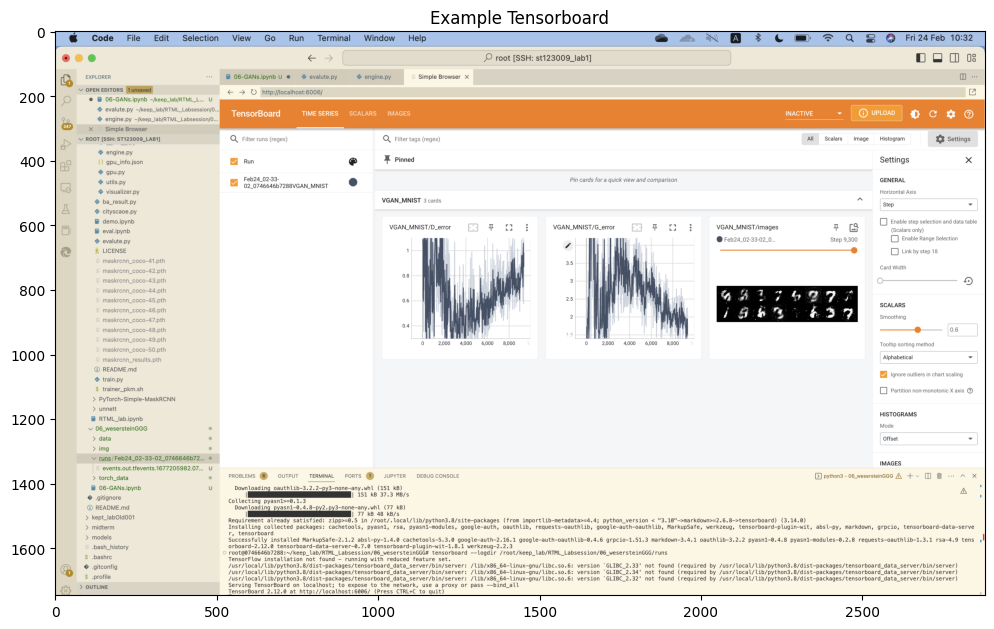

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(1, figsize=(12, 9), dpi=100);plt.title('Example Tensorboard')
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-02-24 at 10.32.11.png'));plt.show()

- ### 2.2 Example of Gan Model

``` py
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

# Function to create noise samples for the generator's input

def noise(size):
    n = torch.randn(size, 100)
    if torch.cuda.is_available(): return n.cuda() 
    return n


class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)
```

-------------------------

## 3. Result

### 1.1 VGAN on MNIST

- Parameter
```py
# Optimizers

d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

# Loss function

loss = nn.BCELoss()

# How many epochs to train for

num_epochs = 200

# Number of steps to apply to the discriminator for each step of the generator (1 in Goodfellow et al.)

d_steps = 1
```
- How to train
```py
def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # Propagate real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # Propagate fake data
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # Take a step
    optimizer.step()
    
    # Return error
    return error_real + error_fake, prediction_real, prediction_fake

def train_generator(optimizer, fake_data):
    # Reset gradients
    optimizer.zero_grad()

    # Propagate the fake data through the discriminator and backpropagate.
    # Note that since we want the generator to output something that gets
    # the discriminator to output a 1, we use the real data target here.
    prediction = discriminator(fake_data)
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    
    # Update weights with gradients
    optimizer.step()
    
    # Return error
    return error
```

- #### Result



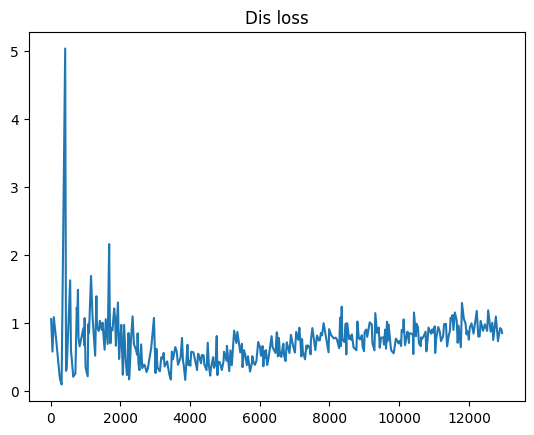

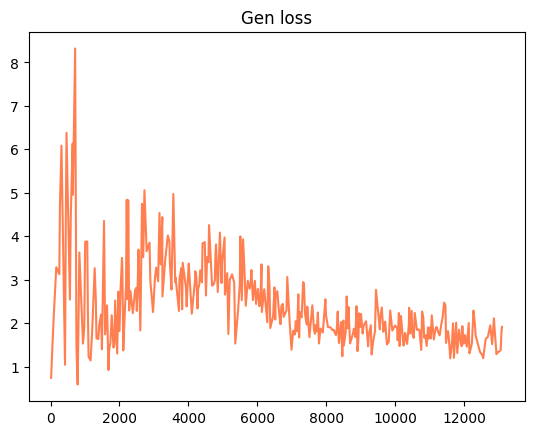

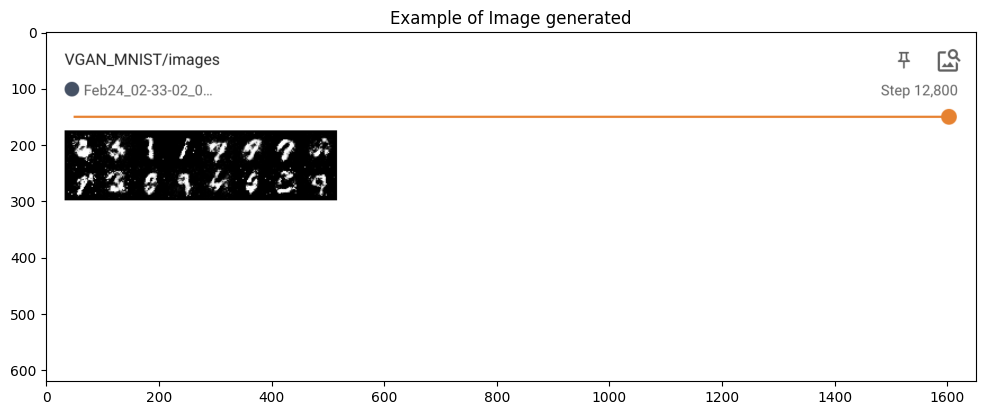

In [17]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
DCcifarDloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/VGANMNIST_DError.csv')
DCcifarGloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/VGAN_MNIST_GError.csv')
DCcifarDloss.head()
plt.title('Dis loss')
plt.plot(DCcifarDloss['Step'][::3],DCcifarDloss['Value'][::3],label='D loss')
plt.show()
plt.title('Gen loss')
plt.plot(DCcifarGloss['Step'][::3],DCcifarGloss['Value'][::3],c='coral',label='G loss')
plt.show()

import os

plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-02-24 at 11.00.04.png'))
plt.title('Example of Image generated')
plt.show()


- #### Result in format of Tensorboard


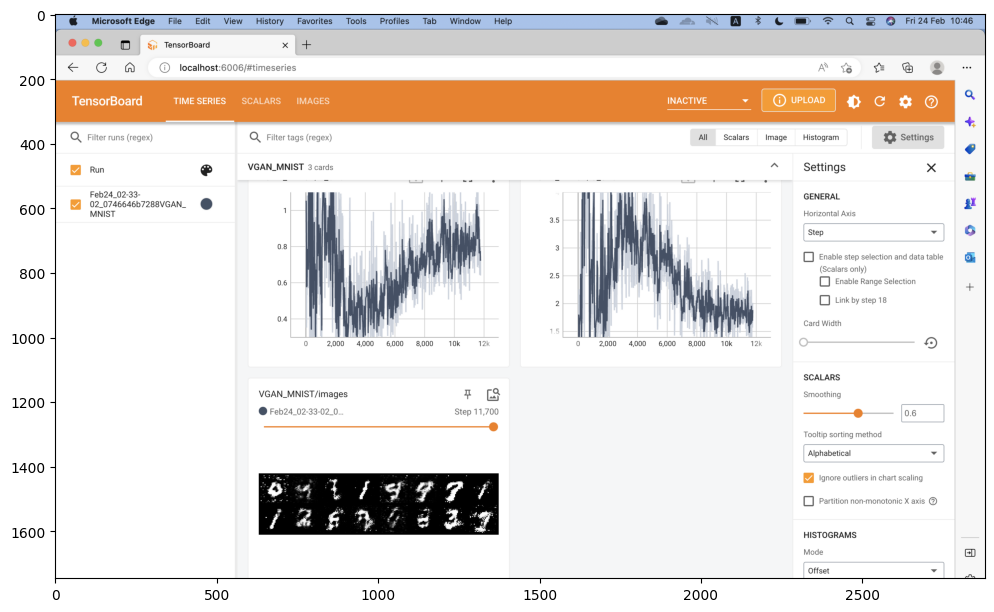

In [16]:
plt.figure(1, figsize=(12, 9), dpi=100);plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-02-24 at 10.46.24.png'));plt.show()


- ### 1.2 DCGAN with CIFAR10
    - Result

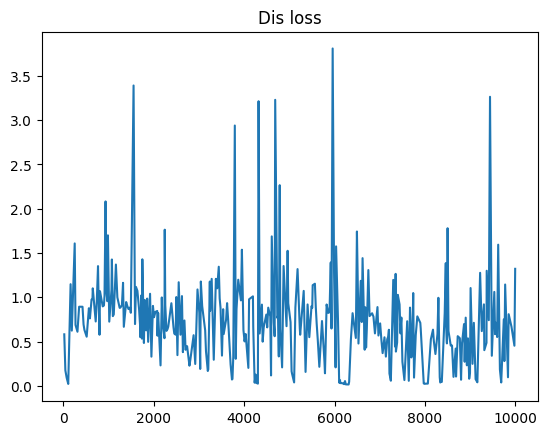

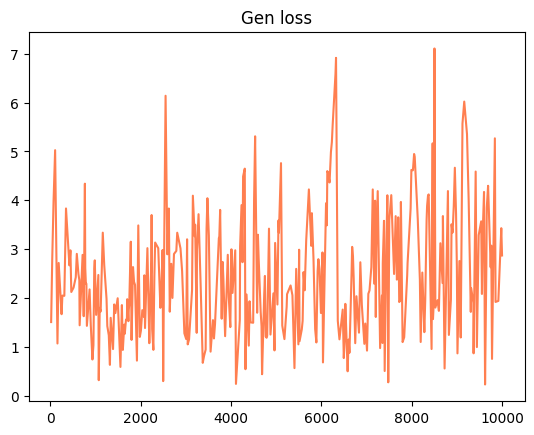

In [21]:
DCcifarDloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Dloss_DCganCifar10.csv')
DCcifarGloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/gloss_DCganCifar10.csv')
DCcifarDloss.head()
plt.title('Dis loss')
plt.plot(DCcifarDloss['Step'][::3],DCcifarDloss['Value'][::3],label='D loss')
plt.show()
plt.title('Gen loss')
plt.plot(DCcifarGloss['Step'][::3],DCcifarGloss['Value'][::3],c='coral',label='G loss')
plt.show()





- Example of result generated image

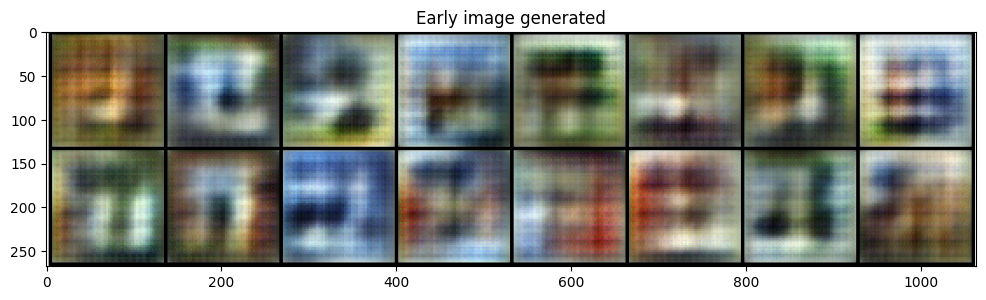

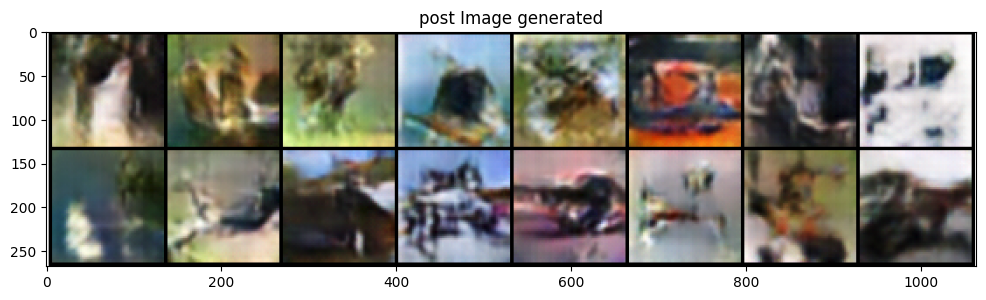

In [20]:
plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-03-01 at 11.53.29.png'))

# plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-03-01 at 11.53.10.png'))
plt.title('Early image generated')
plt.show()

plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-03-01 at 11.53.10.png'));plt.title('post Image generated')
plt.show()

- ### 2. Custom dataset generated
    - My dataset structure

``` py
import numpy as np
import torch


class SSS_dataset():

    def __init__(self, num_sample=1000):
        self.pi = np.pi
        self.num_sample = num_sample
        self.r = torch.randn(self.num_sample, 1)
        self.theta = torch.FloatTensor(
            self.num_sample, 1).uniform_(0, 2*self.pi)
        self.a = 10 + self.r
        self.data = torch.empty(self.num_sample, 2)
        # self.label = 0
        # self.Y = torch.empty(self.num_sample,1)
        for i in range(self.num_sample):
            if 0.5 * self.pi <= self.theta[i] and self.theta[i] <= (3/2) * self.pi:
                self.a = 10 + self.r[i]
                self.x_data = self.a * torch.cos(self.theta[i])
                self.y_data = (self.a * torch.sin(self.theta[i])) + 10
                self.data[i, 0] = self.x_data
                self.data[i, 1] = self.y_data

            else:
                self.a = 10 + self.r[i]
                self.x_data = self.a * torch.cos(self.theta[i])
                self.y_data = (self.a * torch.sin(self.theta[i])) - 10
                self.data[i, 0] = self.x_data
                self.data[i, 1] = self.y_data

        self.len = self.data.shape[0]

    def __getitem__(self, index):
        # return (self.X[index], self.Y[index])
        return self.data[index]

    def __len__(self):
        return self.len

```

- Result
```
Epoch: [29/30], Batch Num: [990/1000]
Discriminator Loss: 1.3881, Generator Loss: 0.6880
D(x): 0.5023, D(G(z)): 0.5026
```

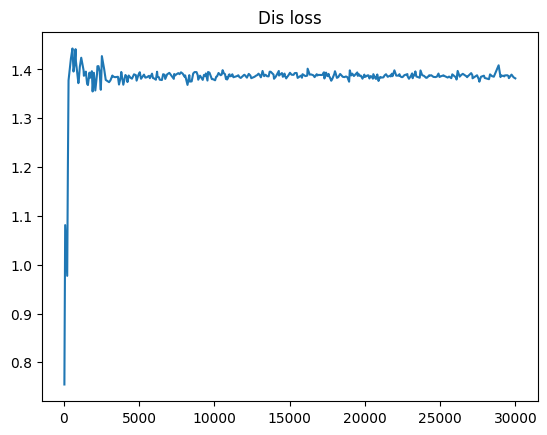

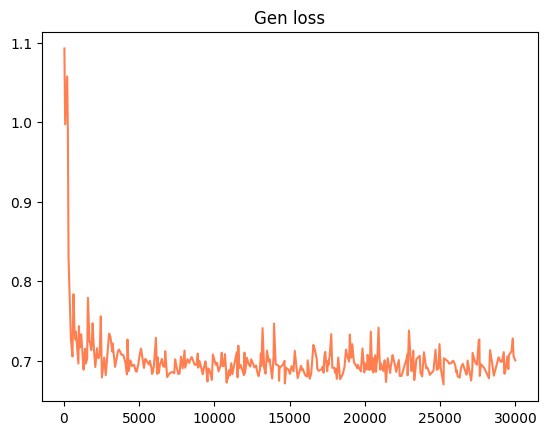

In [22]:
DCcifarDloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task2/D_lossVGAN_SNAKE.csv')
DCcifarGloss = pd.read_csv('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task2/G_lossMar01_04-12-57_0746646b7288VGAN_SNAKE.csv')
DCcifarDloss.head()
plt.title('Dis loss')
plt.plot(DCcifarDloss['Step'][::3],DCcifarDloss['Value'][::3],label='D loss')
plt.show()
plt.title('Gen loss')
plt.plot(DCcifarGloss['Step'][::3],DCcifarGloss['Value'][::3],c='coral',label='G loss')
plt.show()





- Generated image result

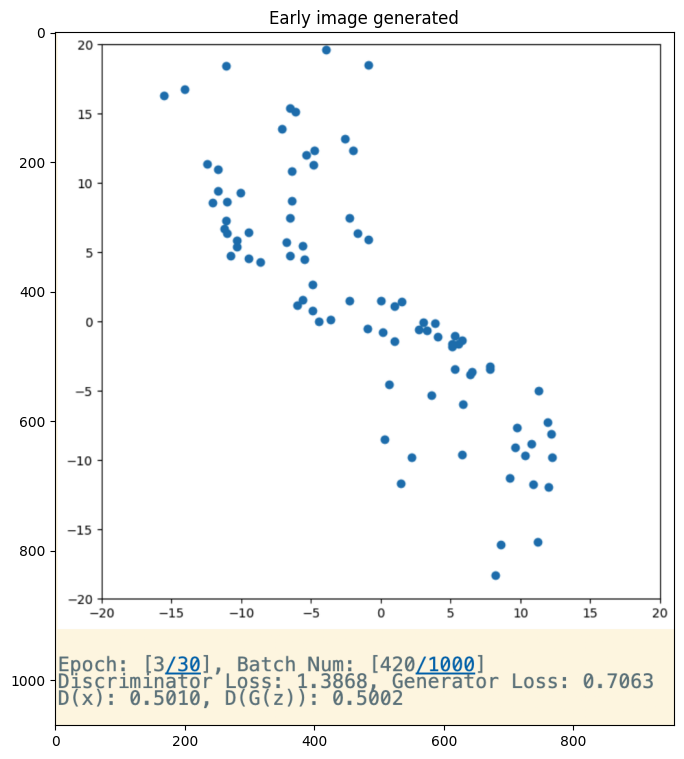

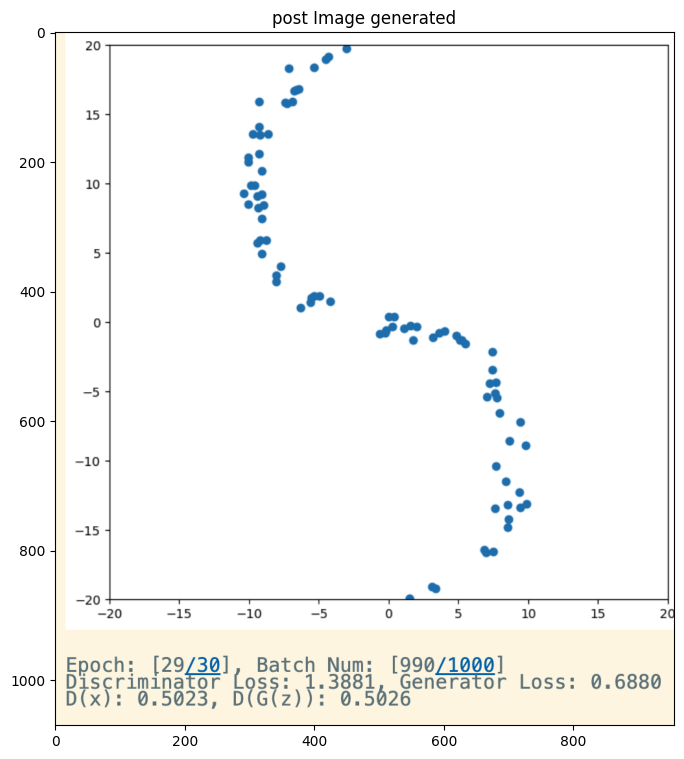

In [23]:
plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task2/Screen Shot 2023-03-01 at 11.14.47.png'))

# plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-03-01 at 11.53.10.png'))
plt.title('Early image generated')
plt.show()

plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task2/Screen Shot 2023-03-01 at 11.37.09.png'));plt.title('post Image generated')
plt.show()

## 3. Face generation

- #### dataset
    - Reference : http://vis-www.cs.umass.edu/lfw/#download
    - Disclaimer : `Labeled Faces in the Wild is a public benchmark for face verification, also known as pair matching. No matter what the performance of an algorithm on LFW, it should not be used to conclude that an algorithm is suitable for any commercial purpose.` 
    - Example structure
``` bash
lfw/Dan_Prinster/
lfw/Dan_Prinster/Dan_Prinster_0001.jpg
lfw/Henning_Scherf/
lfw/Henning_Scherf/Henning_Scherf_0001.jpg
lfw/Kang_Gum-sil/
lfw/Kang_Gum-sil/Kang_Gum-sil_0001.jpg
lfw/Denys_Arcand/
lfw/Denys_Arcand/Denys_Arcand_0001.jpg
lfw/Dwayne_Williams/

lfw/Nan_Wang/Nan_Wang_0003.jpg
lfw/Nan_Wang/Nan_Wang_0004.jpg
...
lfw/Infanta_Cristina/Infanta_Cristina_0001.jpg
lfw/Cuba_Gooding_Jr/
lfw/Cuba_Gooding_Jr/Cuba_Gooding_Jr_0001.jpg
lfw/Glenn_Rivers/
...
lfw/Joseph_Fiennes/
lfw/Joseph_Fiennes/Joseph_Fiennes_0001.jpg
lfw/Colin_Prescot/
lfw/Colin_Prescot/Colin_Prescot_0001.jpg
```

- ### Result

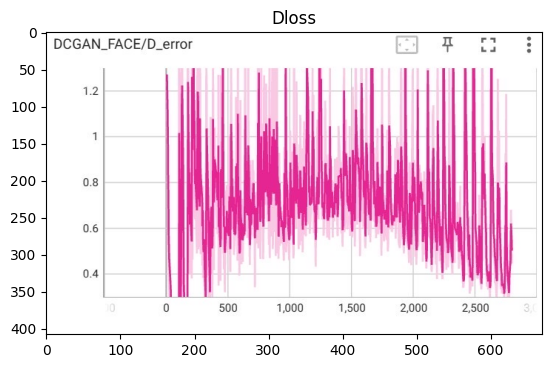

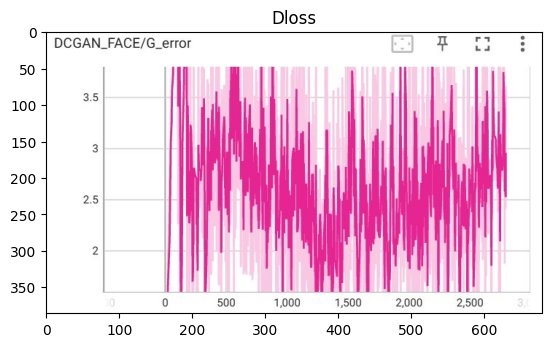

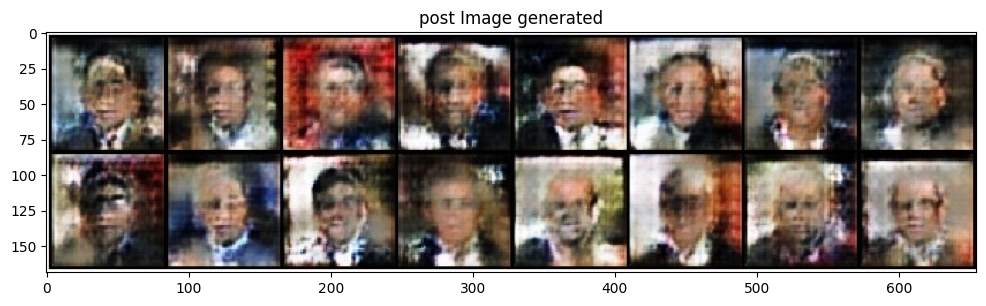

In [24]:
# plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task3/Derror.JPG'))

plt.title('Dloss')
plt.show()

# plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task3/ggan.JPG'))

# plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task1/Screen Shot 2023-03-01 at 11.53.10.png'))
plt.title('Dloss')
plt.show()


plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(mpimg.imread('/root/keep_lab/RTML_Labsession/06_wesersteinGGG/to_reportlab6/task3/3result.JPG'));plt.title('post Image generated')
plt.show()

## Conclusion

- task 1
    - In MNIST with VGAN, we observe that the model can learn how to generate nimber easily and the loss can be converge.
    - IN CIFAR with DCGAN, we get the model that not yet finish. The model can generate some random combination of many class in cifar class and the loss are not fully converge.
- task 2
    - Traing GANs on SSS dataset is faster than when on MINIST and CIFAR. That is due to the less complexity of the data. Both loss can be converge very fast at very first epoch.
- task 3 
    - Face generating with `lfw` datasets and DCGAN, as we can observe the loss plot is not yet converge and the result got stuck at this same image quite a while.
    - We can conclude that the dataset might be too small for this task
    